In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx')

In [3]:
data

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [20]:
data.head(21)

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
5,33.00,2,6,0.455581,777,0,0
6,34.00,2,6,1.395041,837,0,0
7,36.00,1,4,0.351180,738,0,1
8,37.00,3,1,0.822199,714,0,0
9,58.00,1,4,0.867679,788,0,0


In [21]:
1000000/750000

1.3333333333333333

In [23]:
750000/1000000

0.75

In [ ]:
#
#
# current city
# request(Loan amount)/cost ratio ? or inverse or somthing else
# what is the good cibil score
# overdrafts - money that widraw above/without balance
# bounces

In [ ]:
# no null
# no encoding

In [11]:
# outlier
[data.mean() < data.std()]

[Age                           False
 Total Work Experience         False
 Number of years in city       False
 Cost to Request Ratio         False
 Cibil score                   False
 Overdrafts past12months        True
 Total bounces past12months     True
 dtype: bool]

In [14]:
data['Overdrafts past12months'].value_counts()

Overdrafts past12months
0     7187
1     1375
2      183
3      104
4       45
5       37
6       27
7       13
8        8
11       5
10       5
9        5
12       1
Name: count, dtype: int64

In [18]:
data['Total bounces past12months'].value_counts()

Total bounces past12months
0     5874
1     1212
2      535
3      335
4      212
5      173
6      133
7      132
8      110
9       89
10      76
11      72
12      42
Name: count, dtype: int64

In [6]:
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


In [8]:
import matplotlib.pyplot as plt

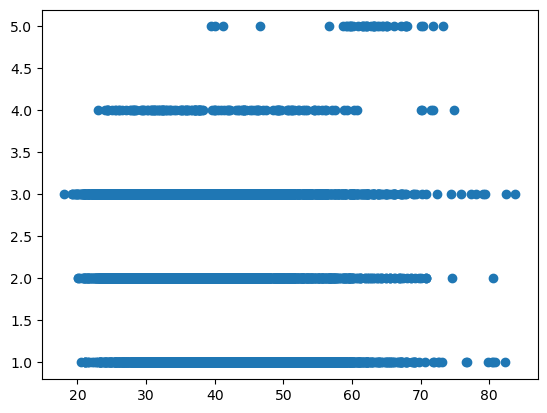

In [9]:
plt.scatter(data['Age'],data['Total Work Experience'])

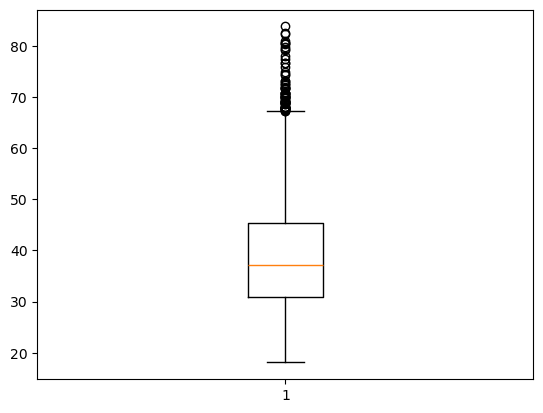

In [12]:
plt.boxplot(data['Age']);

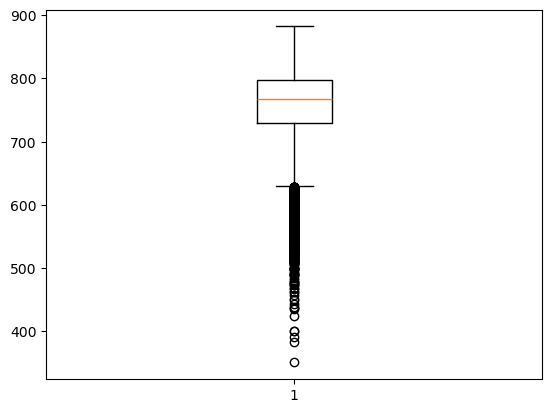

In [13]:
plt.boxplot(data['Cibil score']);

In [25]:
import seaborn as sns

In [14]:
data.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months',
       'Total bounces past12months'],
      dtype='object')

In [4]:
x=data.drop('Total bounces past12months',axis=1)
y=data['Total bounces past12months']

In [ ]:
# start

In [6]:
from sklearn.model_selection import train_test_split

In [105]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,train_size=0.8,random_state=90)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [106]:
model=KNeighborsClassifier(n_neighbors=5)

In [107]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [108]:
model.score(x_train,y_train)

0.6742634797109506

In [109]:
model.score(x_test,y_test)

0.6703724291272929

In [110]:
train_score=[]
test_score=[]
for i in range(1,15):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))

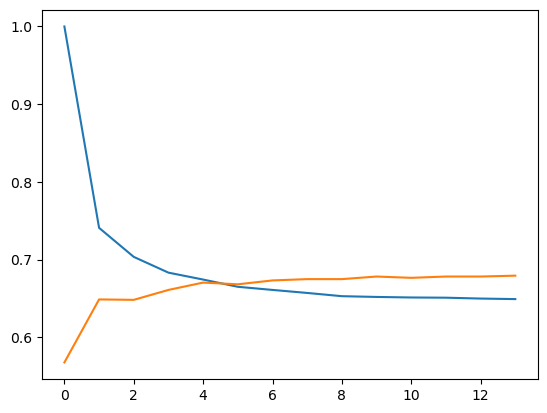

In [111]:
#90
plt.plot(train_score)
plt.plot(test_score)

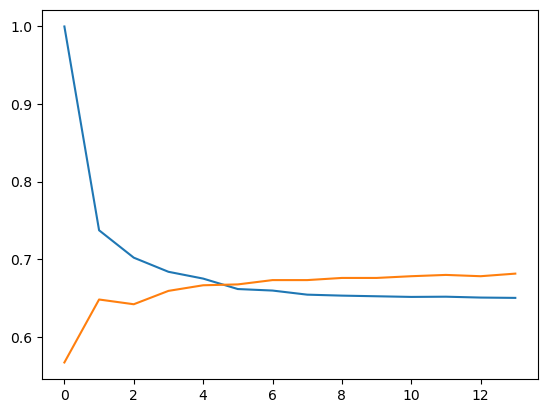

In [55]:
#0
plt.plot(train_score)
plt.plot(test_score)

In [57]:
t={'Train_score':train_score,'Test_score':test_score}
pd.DataFrame(t)

,Train_score,Test_score
0,1.000000,0.566982
1,0.737354,0.648138
2,0.702057,0.642023
3,0.683852,0.659255
4,0.675097,0.666481
5,0.661618,0.667593
6,0.659672,0.673152
7,0.654391,0.673152
8,0.653141,0.675931
9,0.652307,0.675931


In [58]:
model=KNeighborsClassifier(n_neighbors=6) # above table it's on 5 th index(because index start with 0)

In [59]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [60]:
model.score(x_train,y_train)

0.6616175653140633

In [61]:
model.score(x_test,y_test)

0.6675931072818232

# scaling

In [222]:
from sklearn.preprocessing import StandardScaler

In [223]:
xs=StandardScaler().fit_transform(x)

In [139]:
from sklearn.preprocessing import MinMaxScaler

In [140]:
xs=MinMaxScaler().fit_transform(x)

In [8]:
from sklearn.preprocessing import RobustScaler

In [9]:
xs=RobustScaler().fit_transform(x)

In [10]:
x.columns

Index(['Age', 'Total Work Experience', 'Number of years in city',
       'Cost to Request Ratio', 'Cibil score', 'Overdrafts past12months'],
      dtype='object')

In [11]:
xs=pd.DataFrame(xs,columns=x.columns)

In [276]:
x_trains , x_tests ,y_trains , y_tests = train_test_split(xs,y,train_size=0.8,random_state=90)

In [277]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_trains,y_trains)

KNeighborsClassifier()

In [278]:
model.score(x_trains,y_trains)

0.7294330183435241

In [279]:
model.score(x_tests,y_tests)

0.7070594774874931

In [280]:
model.score(x_trains,y_trains)-model.score(x_tests,y_tests)

0.02237354085603105

In [281]:
train_scores=[]
test_scores=[]
for i in range(1,15):
    models=KNeighborsClassifier(n_neighbors=i)
    models.fit(x_trains,y_trains)
    train_scores.append(models.score(x_trains,y_trains))
    test_scores.append(models.score(x_tests,y_tests))

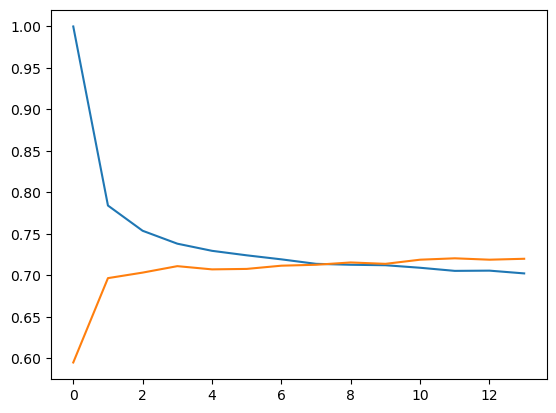

In [282]:
#0
plt.plot(train_scores)
plt.plot(test_scores)

In [275]:
ts={'Train_score':train_scores,'Test_score':test_scores}
pd.DataFrame(ts)

,Train_score,Test_score
0,1.000000,0.592071
1,0.781131,0.698036
2,0.747776,0.698777
3,0.733005,0.703223
4,0.723793,0.702853
5,0.719028,0.704335
6,0.711563,0.707670
7,0.709180,0.707299
8,0.708545,0.708040
9,0.706957,0.709152


In [ ]:
#    random state,index(above table),n_neighbors
# s 90 6 7
#s 0 8 9
#sss(robust) 90 7 8    0.713730	0.712618 - done
#sss 7 90 8 9	0.708545	0.708040

In [18]:
# after scaling coding
x_trains , x_tests ,y_trains , y_tests = train_test_split(xs,y,train_size=0.8,random_state=90)
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_trains,y_trains)
model.score(x_trains,y_trains)
model.score(x_tests,y_tests)


0.7126181211784325

In [ ]:
# remove outlier try